## Data Analysis on House Price Prediction

###### The aim of this report is to predict the house prices based on various parameters.

In [2]:
# Importing the required libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

- Let us view the data in a dataframe format.

- We use the head function to view the first ten rows of the data set.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
dt = data.head(10)
dt

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


- We will now check if our data set contains any null values or not.

In [5]:
dt.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is No null value present.

- We will now describe the data set using the describe function which tells us about the statistical data related to the data set.

In [7]:
dt.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.039155e+09,4.380750e+05,3.100000,2.100000,2002.500000,16846.200000,1.300000,0.0,0.0,3.200000,7.400000,1645.500000,357.00000,1971.300000,199.100000,98097.900000,47.536370,-122.226200,2172.800000,16799.700000
std,2.331445e+09,3.137603e+05,0.567646,1.094177,1305.367658,29937.105556,0.483046,0.0,0.0,0.632456,1.349897,907.617302,536.18094,23.748918,629.609482,67.497243,0.146307,0.144383,1010.959149,29940.536112
min,1.321400e+09,1.800000e+05,2.000000,1.000000,770.000000,5000.000000,1.000000,0.0,0.0,3.000000,6.000000,770.000000,0.00000,1933.000000,0.000000,98003.000000,47.309700,-122.393000,1340.000000,5000.000000
25%,2.109650e+09,2.365000e+05,3.000000,1.125000,1305.000000,6624.750000,1.000000,0.0,0.0,3.000000,7.000000,1052.500000,0.00000,1956.250000,0.000000,98041.750000,47.434925,-122.325000,1660.000000,6990.000000
50%,3.140351e+09,3.074250e+05,3.000000,2.125000,1747.500000,7356.000000,1.000000,0.0,0.0,3.000000,7.000000,1430.000000,0.00000,1964.000000,0.000000,98099.500000,47.516550,-122.286000,1790.000000,7604.500000
75%,6.218450e+09,5.310000e+05,3.000000,2.437500,1942.500000,9303.250000,1.750000,0.0,0.0,3.000000,7.000000,1846.250000,647.50000,1993.000000,0.000000,98143.500000,47.646275,-122.092000,2352.000000,8100.250000
max,7.237550e+09,1.225000e+06,4.000000,4.500000,5420.000000,101930.000000,2.000000,0.0,0.0,5.000000,11.000000,3890.000000,1530.00000,2003.000000,1991.000000,98198.000000,47.737900,-122.005000,4760.000000,101930.000000


### Univariate Analysis

__Univariate refers to an expression of only one variable. This is the simplest method of analysis.__

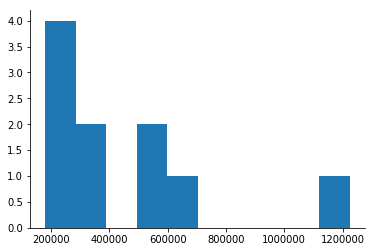

In [8]:
plt.hist(x = 'price', data = dt)
sns.despine()

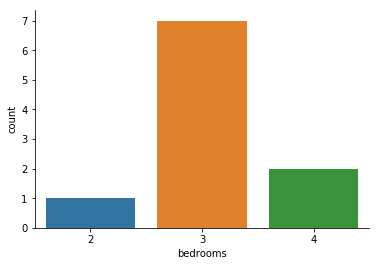

In [9]:
sns.countplot(x='bedrooms', data= dt)
sns.despine()

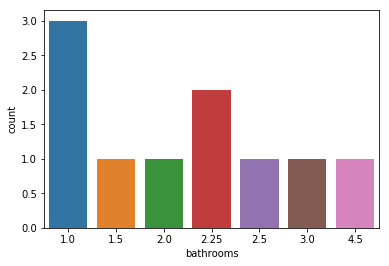

In [10]:
sns.countplot(x = 'bathrooms', data = dt)

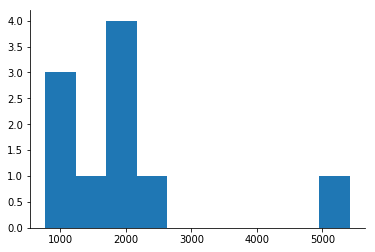

In [19]:
plt.hist(x = 'sqft_living', data = dt)
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


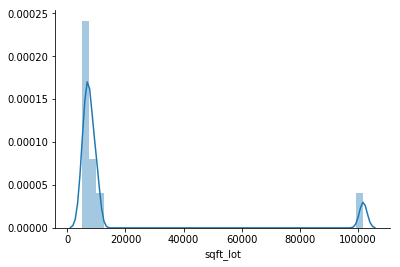

In [13]:
sns.distplot(dt['sqft_lot'])
sns.despine()

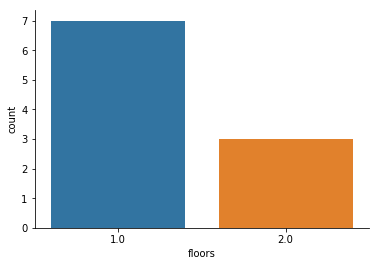

In [20]:
sns.countplot(x = 'floors', data = dt)
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


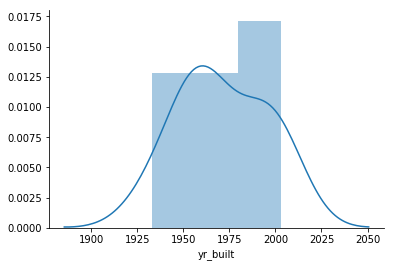

In [23]:
sns.distplot(dt['yr_built'])
sns.despine()

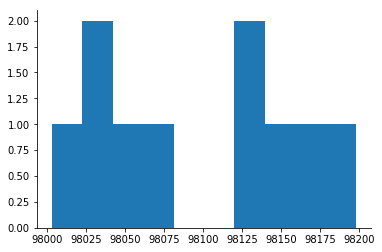

In [24]:
plt.hist(x = 'zipcode', data =dt)
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


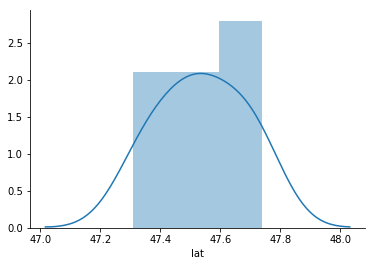

In [26]:
sns.distplot(dt['lat'])
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


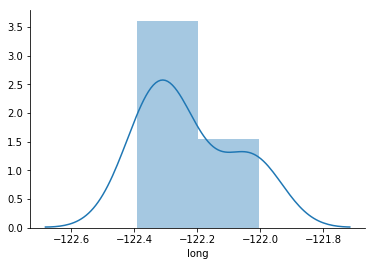

In [28]:
sns.distplot(dt['long'])
sns.despine()

### Bivariate Analysis

__Bivariate refers to an expression of only two variable. It tells us about the relation between the two variable.__

In [30]:
dt.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.367985,0.004542,0.182635,0.423402,0.477555,-0.058058,NaN,NaN,-0.233890,0.321854,0.438544,0.288455,-0.249859,0.357920,0.027420,0.610802,0.280091,0.421167,0.473946
price,0.367985,1.000000,0.755438,0.909927,0.938850,0.870373,-0.143489,NaN,NaN,0.185811,0.912328,0.865421,0.820755,0.454468,0.111901,-0.146580,0.370648,0.466990,0.695824,0.873206
bedrooms,0.004542,0.755438,1.000000,0.787127,0.690895,0.523618,-0.121566,NaN,NaN,0.557086,0.667017,0.544443,0.760427,0.508535,-0.061898,0.182988,-0.130269,0.082969,0.237608,0.536532
bathrooms,0.182635,0.909927,0.787127,1.000000,0.876234,0.752348,0.147157,NaN,NaN,0.289010,0.797398,0.840891,0.709836,0.661480,0.048168,-0.345126,0.069688,0.441827,0.662869,0.758861
sqft_living,0.423402,0.938850,0.690895,0.876234,1.000000,0.907429,0.029516,NaN,NaN,-0.011440,0.919351,0.945439,0.834179,0.522392,0.152753,-0.230438,0.273431,0.472229,0.780500,0.914555
sqft_lot,0.477555,0.870373,0.523618,0.752348,0.907429,1.000000,-0.229872,NaN,NaN,-0.139036,0.930458,0.860545,0.752512,0.422756,-0.112722,-0.238542,0.302559,0.544092,0.909610,0.999649
floors,-0.058058,-0.143489,-0.121566,0.147157,0.029516,-0.229872,1.000000,NaN,NaN,-0.218218,-0.204479,0.212505,-0.287859,0.339964,0.509175,-0.435185,-0.330175,0.002549,-0.045597,-0.217964
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,-0.233890,0.185811,0.557086,0.289010,-0.011440,-0.139036,-0.218218,NaN,NaN,1.000000,-0.104116,-0.230535,0.362386,-0.093208,-0.111111,0.198334,-0.037392,-0.405918,-0.282493,-0.138474


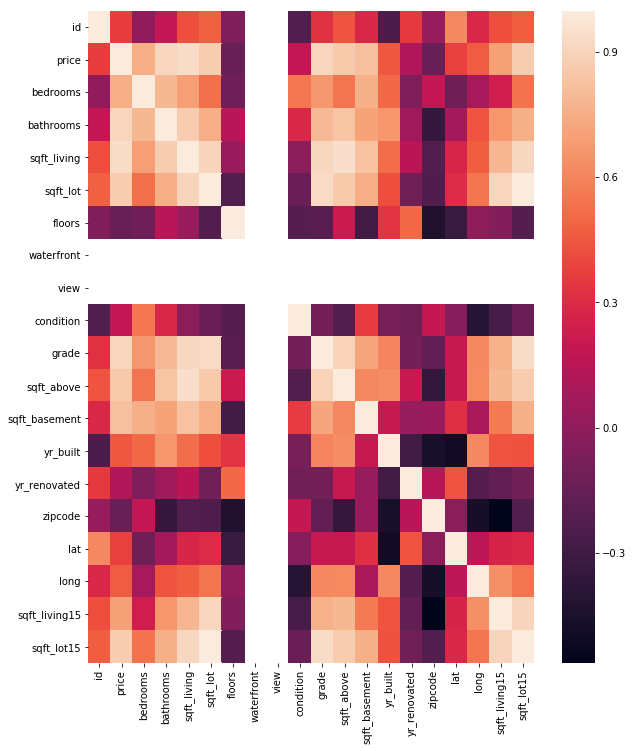

In [33]:
plt.figure(figsize = (10,12))
sns.heatmap(dt.corr())
plt.show()

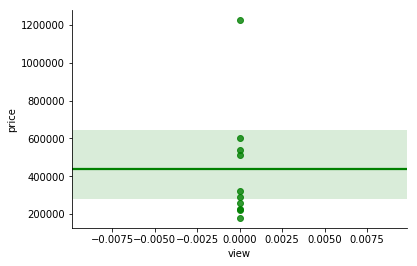

In [55]:
sns.regplot(x = 'view', y='price',data = dt, color = 'green')
sns.despine()

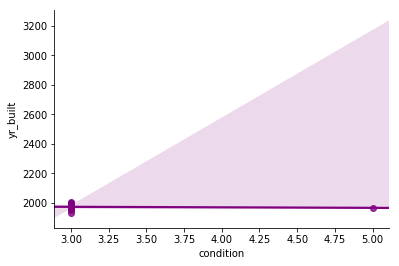

In [38]:
sns.regplot(x = 'condition',y = 'yr_built',data = dt, color='purple')
sns.despine()

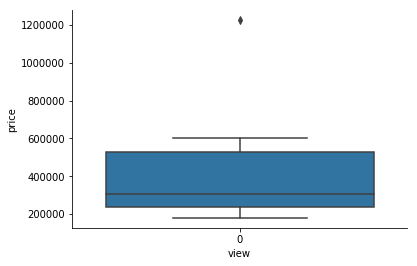

In [39]:
sns.boxplot(x = 'view',y = 'price',data = dt )
sns.despine()

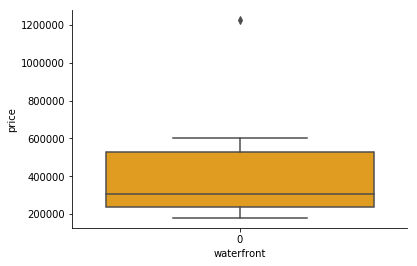

In [41]:
sns.boxplot(x = 'waterfront',y = 'price',data = dt, color='orange')
sns.despine()

### Multivariate Analysis

__Multivariate refers to an expression of more then two variable.__

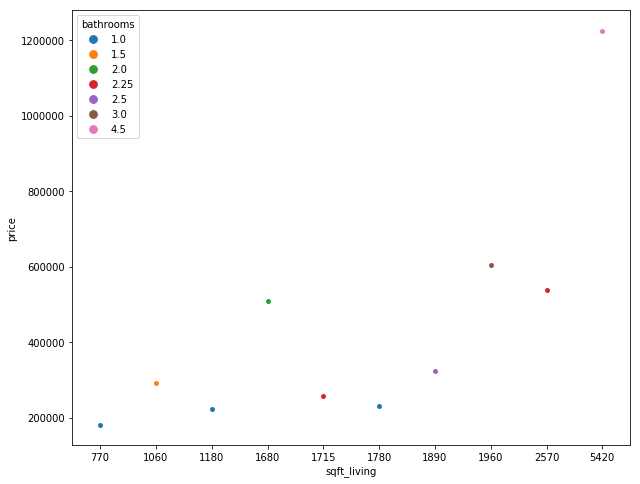

In [35]:
plt.figure(figsize=(10,8))
sns.swarmplot(x= 'sqft_living', y='price', data= dt,hue='bathrooms')

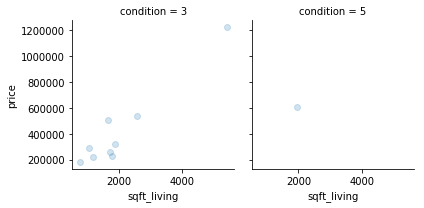

In [42]:
grid = sns.FacetGrid(dt, col='condition',col_wrap=2)
grid.map(plt.scatter,'sqft_living','price',alpha = 0.2)
sns.despine()

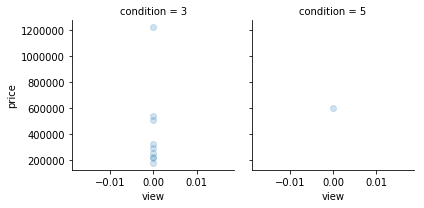

In [44]:
grid = sns.FacetGrid(dt, col='condition',col_wrap=2)
grid.map(plt.scatter,'view','price',alpha = 0.2)
sns.despine()

### Final Plot

__This is the final section where three most interesting graphs plot.__

- We have included this plot as the built year helps us to price the houses well.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


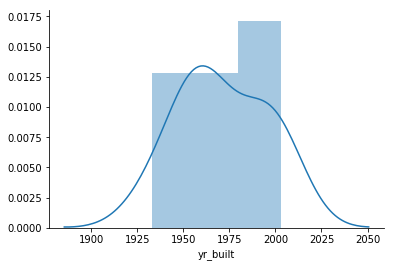

In [45]:
sns.distplot(dt['yr_built'])
sns.despine()

- We have included this graph as views around the house plays a major role in depicting the prices

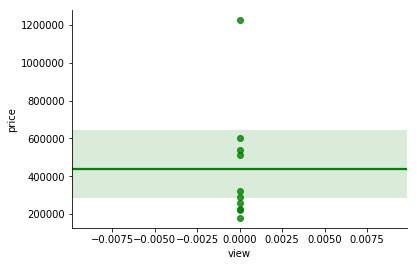

In [48]:
sns.regplot(x = 'view', y='price',data = dt, color = 'green')
sns.despine()

- It shows the correlation between different components of the house.

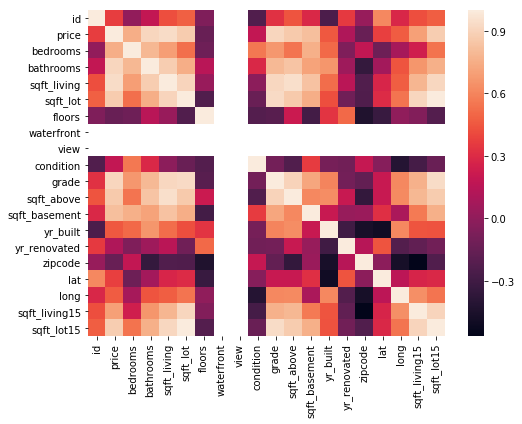

In [49]:
plt.figure(figsize = (8,6))
sns.heatmap(dt.corr())
plt.show()